In [1]:
# Import required libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from api_keys import weather_api_key
from citipy import citipy
import time

# Define the OpenWeatherMap API URL
url = "http://api.openweathermap.org/data/2.5/weather?"


In [2]:
# Generate a list of random latitudes and longitudes
lats = np.random.uniform(low=-90.0, high=90.0, size=1500)
lngs = np.random.uniform(low=-180.0, high=180.0, size=1500)
lat_lngs = zip(lats, lngs)

# Create a list to hold cities
cities = []

# Identify the nearest city for each set of coordinates
for lat, lng in lat_lngs:
    city = citipy.nearest_city(lat, lng).city_name
    
    # If the city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)

# Display the count of cities found
print(f"Found {len(cities)} unique cities.")


Found 586 unique cities.


In [3]:
# List to store weather data
weather_data = []

# Loop through each city to get weather data
for city in cities:
    query_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    try:
        response = requests.get(query_url).json()
        
        # Extract relevant data points
        temp = response['main']['temp']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        wind_speed = response['wind']['speed']
        lat = response['coord']['lat']
        lon = response['coord']['lon']
        
        # Append the data to the list
        weather_data.append({
            "City": city,
            "Latitude": lat,
            "Longitude": lon,
            "Temperature": temp,
            "Humidity": humidity,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed
        })
    except KeyError:
        # Handle any missing data
        print(f"Data not found for city {city}.")
    time.sleep(1)  # To avoid hitting API rate limits

# Convert the weather data into a DataFrame
weather_df = pd.DataFrame(weather_data)

# Display the DataFrame
weather_df.head()


Data not found for city devinuwara.
Data not found for city tranovaho.
Data not found for city olgii.
Data not found for city toga village.
Data not found for city taiohae.
Data not found for city beteza.
Data not found for city ahau.
Data not found for city raudales malpaso.
Data not found for city james island.
Data not found for city fuvahmulah.
Data not found for city 'amran.
Data not found for city qal'at bishah.
Data not found for city maiwut.
Data not found for city vingt cinq.
Data not found for city 'ohonua.
Data not found for city miyanoura.
Data not found for city puerto san carlos.
Data not found for city zangguy.
Data not found for city gjakove.
Data not found for city cable beach.
Data not found for city gold canyon.
Data not found for city cargados carajos.
Data not found for city ouellah.
Data not found for city kapyl'.


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,bethel,41.3712,-73.4140,27.90,40,0,3.09
1,stanley,54.8680,-1.6985,8.31,74,0,2.06
2,tindouf,27.6711,-8.1474,26.50,23,93,3.42
3,margaret river,-33.9500,115.0667,12.53,68,72,2.89
4,luang prabang,19.8856,102.1347,21.89,90,26,0.51


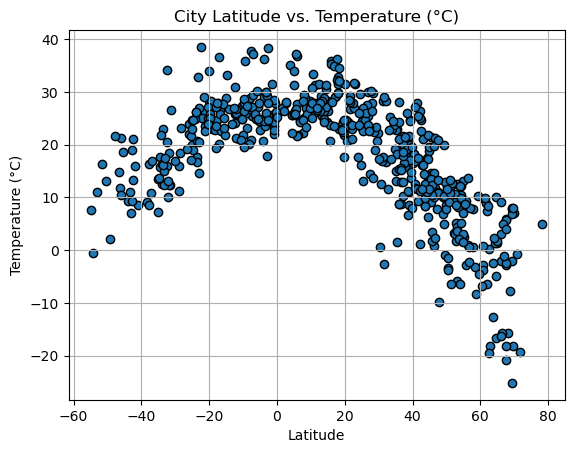

In [5]:
# Latitude vs. Temp
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], edgecolors="black")
plt.title("City Latitude vs. Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


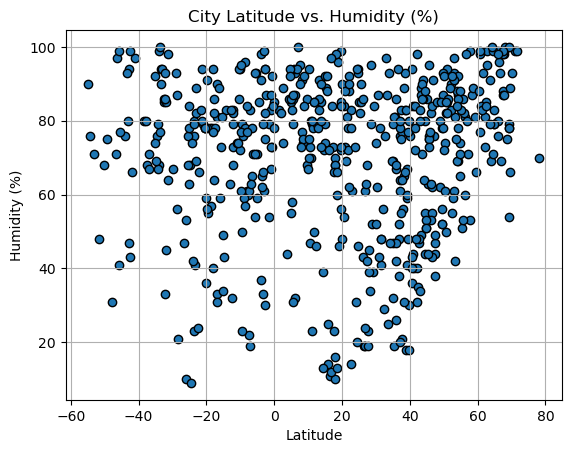

In [6]:
# Latitude vs. Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors="black")
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()


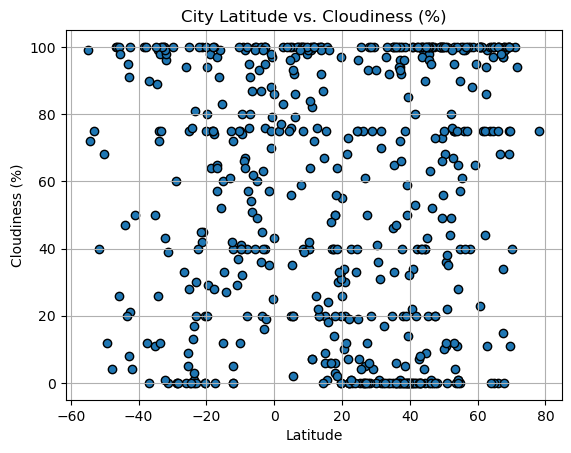

In [7]:
# Latitude vs. Cloudiness
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolors="black")
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()


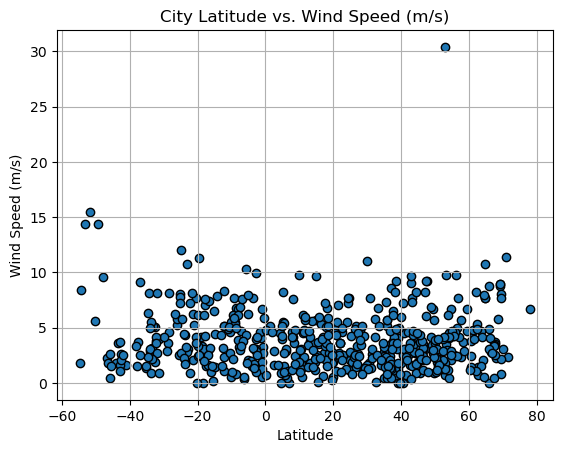

In [9]:
# Latitude vs. Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], edgecolors="black")
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()


In [11]:
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Generate line equation
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    # Plot scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, (min(x_values)+5, max(y_values)-5), fontsize=15, color="red")
    plt.grid(True)
    
    # Display the plot
    plt.show()
    
    # Print r-squared value
    print(f"R-squared value: {r_value**2:.2f}")


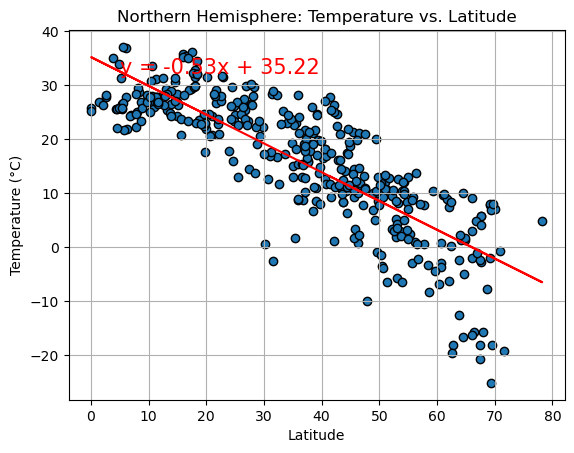

R-squared value: 0.69


In [13]:
# Northern Hemisphere - Temperature vs. Latitude
northern_hemi = weather_df[weather_df['Latitude'] >= 0]
plot_linear_regression(northern_hemi['Latitude'], northern_hemi['Temperature'], 
                       'Northern Hemisphere: Temperature vs. Latitude', 
                       'Latitude', 'Temperature (°C)')


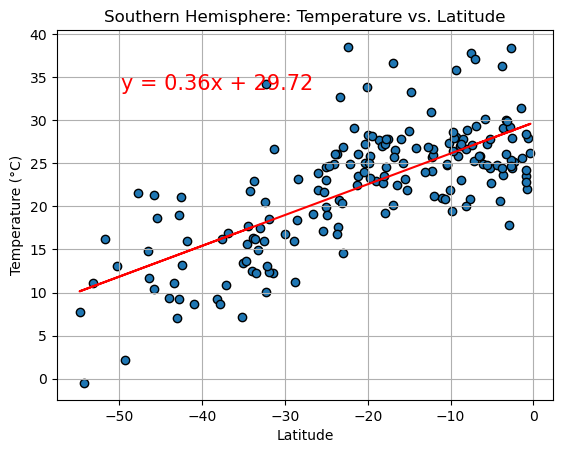

R-squared value: 0.51


In [14]:
# Southern Hemisphere - Temperature vs. Latitude
southern_hemi = weather_df[weather_df['Latitude'] < 0]
plot_linear_regression(southern_hemi['Latitude'], southern_hemi['Temperature'], 
                       'Southern Hemisphere: Temperature vs. Latitude', 
                       'Latitude', 'Temperature (°C)')


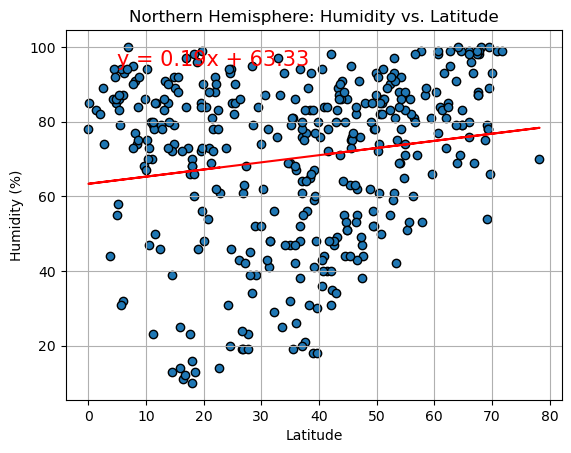

R-squared value: 0.03


In [15]:
# Northern Hemisphere - Humidity vs Latitude
plot_linear_regression(northern_hemi['Latitude'], northern_hemi['Humidity'], 
                       'Northern Hemisphere: Humidity vs. Latitude', 
                       'Latitude', 'Humidity (%)')

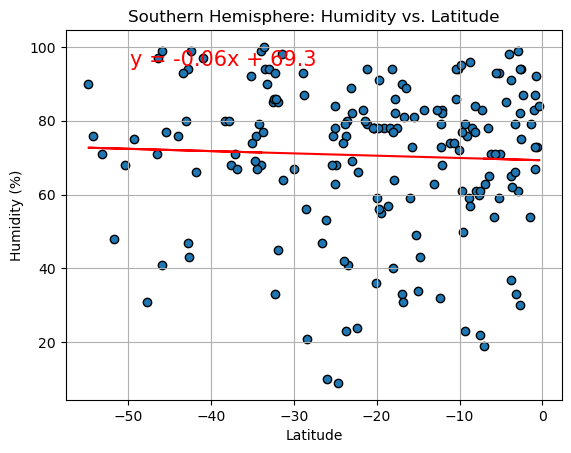

R-squared value: 0.00


In [16]:
# Southern Hemisphere - Humidity vs Latitude
plot_linear_regression(southern_hemi['Latitude'], southern_hemi['Humidity'], 
                       'Southern Hemisphere: Humidity vs. Latitude', 
                       'Latitude', 'Humidity (%)')

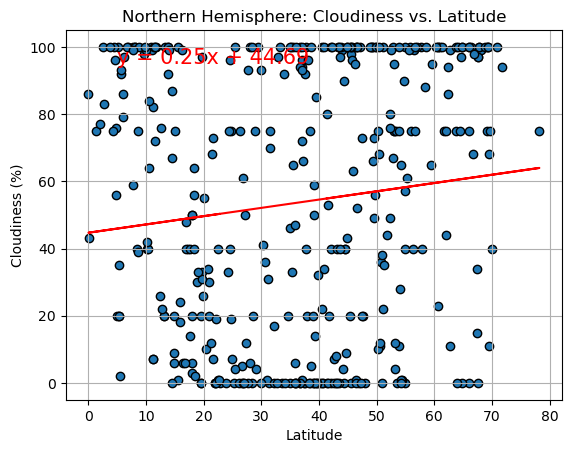

R-squared value: 0.01


In [17]:
# Northern Hemisphere - Cloudiness vs Latitude
plot_linear_regression(northern_hemi['Latitude'], northern_hemi['Cloudiness'], 
                       'Northern Hemisphere: Cloudiness vs. Latitude', 
                       'Latitude', 'Cloudiness (%)')

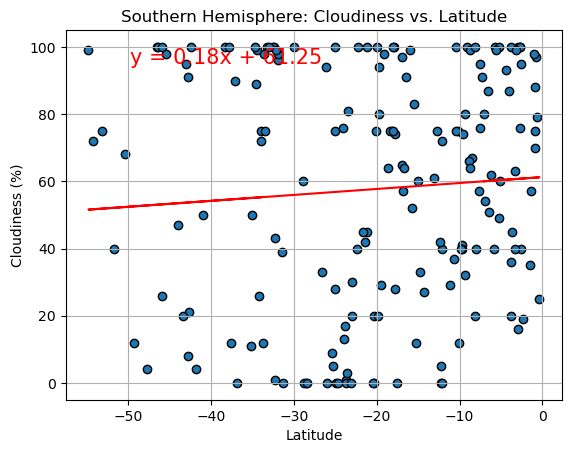

R-squared value: 0.00


In [18]:
# Southern Hemisphere - Cloudiness vs Latitude
plot_linear_regression(southern_hemi['Latitude'], southern_hemi['Cloudiness'], 
                       'Southern Hemisphere: Cloudiness vs. Latitude', 
                       'Latitude', 'Cloudiness (%)')

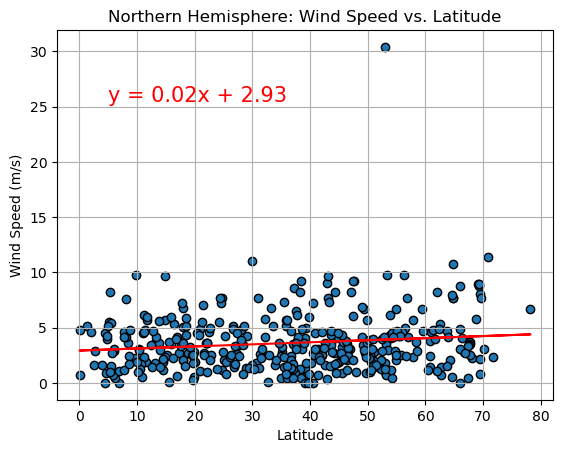

R-squared value: 0.02


In [19]:
# Northern Hemisphere - Wind Speed vs Latitude
plot_linear_regression(northern_hemi['Latitude'], northern_hemi['Wind Speed'], 
                       'Northern Hemisphere: Wind Speed vs. Latitude', 
                       'Latitude', 'Wind Speed (m/s)')

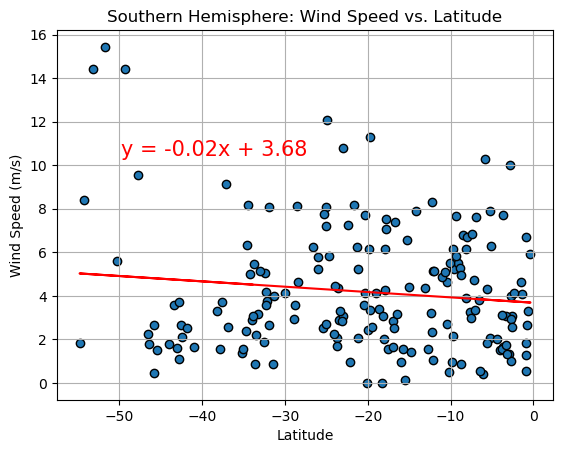

R-squared value: 0.01


In [20]:
# Southern Hemisphere - Wind Speed vs Latitude
plot_linear_regression(southern_hemi['Latitude'], southern_hemi['Wind Speed'], 
                       'Southern Hemisphere: Wind Speed vs. Latitude', 
                       'Latitude', 'Wind Speed (m/s)')

In [21]:
# Save weather data to a CSV file
weather_df.to_csv("weather_data.csv", index=False)


In [1]:
#Summary of Findings:

# In all cases (humidity, cloudiness, and wind speed), the linear regression models suggest weak correlations between latitude and these weather variables. 
# This indicates that while there might be small trends in how these variables change with latitude, they are not strongly influenced by latitude alone.
# Other factors like geography, climate zones, and regional weather patterns likely play a much larger role in determining humidity, cloud cover, and wind speed than latitude does.